<a href="https://colab.research.google.com/github/CosmicParadoxDragon/LearningMachineLearning/blob/main/tensorflow_youtube_02_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building a Classifier in TensorFlow
Types of classification problems:
* Binary Classificiation
* MultiClass Classification
* MultiLabel Classificaiton

## Creating Data to View and Fit


In [ ]:
from sklearn.datasets import make_circles
# Make 1000 examples
n_samples = 1000

# Create circles

x, y = make_circles(n_samples, 
                    noise=0.03,
                    random_state=42)

In [ ]:
x[:10]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [ ]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Data is hard to understand, so we set up a visualization

In [ ]:
import pandas as pd

In [ ]:
circles= pd.DataFrame({"x0":x[:, 0], "x1":x[:, 1], "label":y})
circles

,x0,x1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


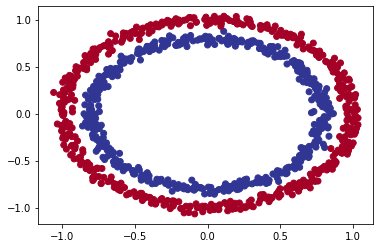

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [ ]:
#
# 
#
def plot_decision_boundary(
    model,
    x,
    y
):
  """
  Plots the decision boundary created by a model's predictions
  """
  # Create a mesh grid
  x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
  y_min, y_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), 
                       np.linspace(y_min, y_max, 100))
  
  
  x_in = np.c_[xx.ravel(), yy.ravel()]

  y_pred = model.predict(x_in)

  if len(y_pred[0]) > 1:
    print("doing multiclass classifiction")
    #reshape predictions for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  plt.show()

In [ ]:
import tensorflow as tf
tf.random.set_seed(42)

model_1 = tf.keras.Sequential(
    [
      tf.keras.Input([2,]),
      # tf.keras.layers.
      tf.keras.layers.Dense(1)
    ]
)

model_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["accuracy"]
)

model_1.fit(x, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4830


In [ ]:
import numpy as np

In [ ]:
# train for longer with more layers
tf.random.set_seed(42)

model_2 = tf.keras.Sequential(
    [
      tf.keras.Input([2,]),
      tf.keras.layers.Dense(10),
      tf.keras.layers.Dense(1)
    ]
)

model_2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["accuracy"]
)

model_2.fit(x, y, epochs=200, verbose=0)

In [ ]:
model_2.evaluate(x, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.5000


[0.6945482492446899, 0.5]

In [ ]:
# Model 3 with activation functions
model_3 = tf.keras.Sequential(
    [
     tf.keras.Input([2,]),
     tf.keras.layers.Dense(100),
     tf.keras.layers.Dense(10),
     tf.keras.layers.Dense(1)
    ]
)

model_3.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["accuracy"]
)

model_3.fit(x, y, epochs=200, verbose=0)

In [ ]:
model_3.evaluate(x, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6953 - accuracy: 0.5000


[0.695257306098938, 0.5]

doing binary classification


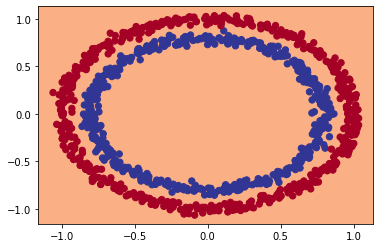

In [ ]:
plot_decision_boundary(model=model_3, x=x, y=y)

In [ ]:
# Model 4 with activation functions
model_4 = tf.keras.Sequential(
    [
     tf.keras.Input([2,]),
     tf.keras.layers.Dense(10, activation="relu"),
     tf.keras.layers.Dense(1)
    ]
)

model_4.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["accuracy"]
)

model_4.fit(x, y, epochs=200, verbose=0)

In [ ]:
model_4.evaluate(x,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.0306 - accuracy: 0.9990


[0.030567357316613197, 0.9990000128746033]

doing binary classification


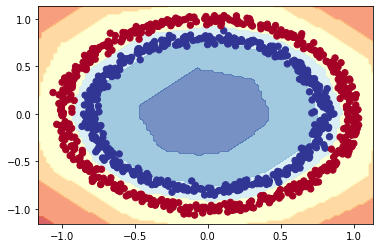

In [ ]:
plot_decision_boundary(model=model_4, x=x, y=y)

In [ ]:
# Mutli Layer Testing

model_5 = tf.keras.models.Sequential([
  tf.keras.Input([2,]),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid"),                                      
])

model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

history_5 = model_5.fit(x, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.7060 - accuracy: 0.4720
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6948 - accuracy: 0.4630
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6897 - accuracy: 0.4980
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6864 - accuracy: 0.5280
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6812 - accuracy: 0.5460
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6758 - accuracy: 0.5550
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6653 - accuracy: 0.5930
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6523 - accuracy: 0.5800
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6310 - accuracy: 0.6460
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6027 - accuracy: 0.6710
Epoch 11/

doing binary classification


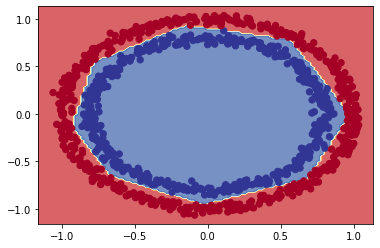

In [ ]:
plot_decision_boundary(model_5, x=x, y=y)

In [ ]:
# Create a toy tensors that is simialr to the data to understand relu and sigmoid

# Linear Function
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

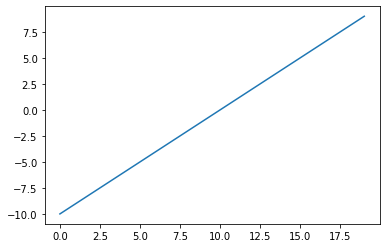

In [ ]:
plt.plot(A)

In [ ]:
# Sigmoid Function

def sigmoid(x):
    return 1 / (1 + tf.exp(-x))
  
B = sigmoid(A)
B

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

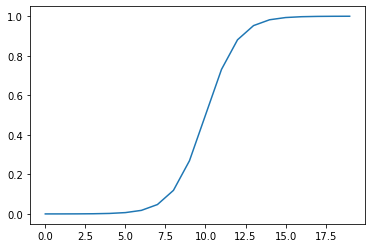

In [ ]:
plt.plot(B)

In [ ]:
# ReLU (Rectified Linear Unit)

def relu(x):
  return tf.maximum(0, x)

C = relu(A)
C

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

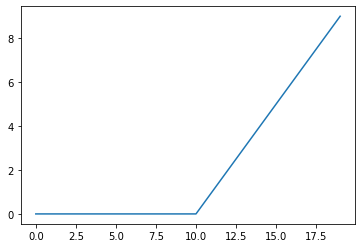

In [ ]:
plt.plot(C)

In [ ]:
# Train Test Spliting
x_train, y_train = x[:800], y[:800]
x_test, y_test = x[800:], y[800:]

# Recreate the model in using the right data split

model_6 = tf.keras.models.Sequential([
  tf.keras.Input([2,]),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid"),                                                                            
])

model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

history_6 = model_6.fit(x_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 2s 3ms/step - loss: 0.7037 - accuracy: 0.4650
Epoch 2/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6878 - accuracy: 0.5238
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6784 - accuracy: 0.5325
Epoch 4/100
25/25 [==============================] - 0s 6ms/step - loss: 0.6695 - accuracy: 0.5625
Epoch 5/100
25/25 [==============================] - 0s 7ms/step - loss: 0.6545 - accuracy: 0.6837
Epoch 6/100
25/25 [==============================] - 0s 8ms/step - loss: 0.6356 - accuracy: 0.6212
Epoch 7/100
25/25 [==============================] - 0s 7ms/step - loss: 0.6100 - accuracy: 0.7138
Epoch 8/100
25/25 [==============================] - 0s 8ms/step - loss: 0.5818 - accuracy: 0.7200
Epoch 9/100
25/25 [==============================] - 0s 4ms/step - loss: 0.5507 - accuracy: 0.7725
Epoch 10/100
25/25 [==============================] - 0s 4ms/step - loss: 0.5160 - accuracy: 0.7887
Epoch 11/

In [ ]:
model_6.evaluate(x_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0095 - accuracy: 1.0000


[0.009518268518149853, 1.0]

doing binary classification


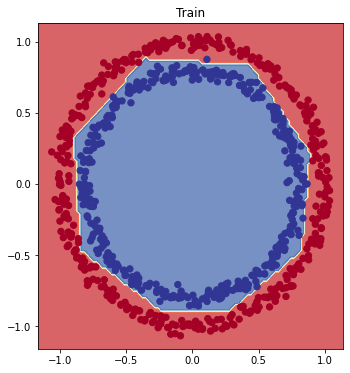

doing binary classification


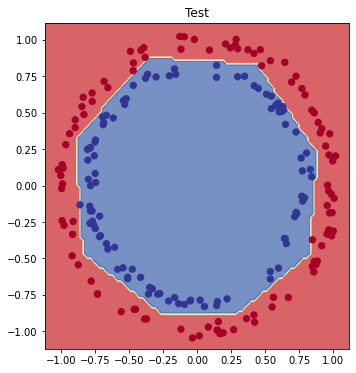

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_6, x=x_train, y=y_train)
plt.figure(figsize=(12,6))
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_6, x=x_test, y=y_test)

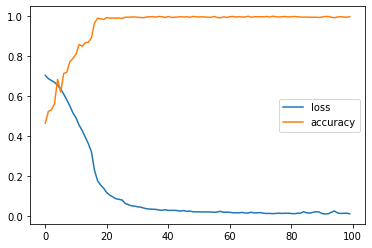

In [ ]:
pd.DataFrame(history_6.history).plot()

In [ ]:
# Finding the ideal learning rate for the model

model_9 = tf.keras.Sequential([
  tf.keras.Input([2,]),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")                               
])

model_9.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 **(epoch/20))

history_9 = model_9.fit(x_test, y_test, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
7/7 [==============================] - 1s 3ms/step - loss: 0.6924 - accuracy: 0.4800 - lr: 1.0000e-04
Epoch 2/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6923 - accuracy: 0.5100 - lr: 1.1220e-04
Epoch 3/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6922 - accuracy: 0.4850 - lr: 1.2589e-04
Epoch 4/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6922 - accuracy: 0.4900 - lr: 1.4125e-04
Epoch 5/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6921 - accuracy: 0.4900 - lr: 1.5849e-04
Epoch 6/100
7/7 [==============================] - 0s 2ms/step - loss: 0.6921 - accuracy: 0.4850 - lr: 1.7783e-04
Epoch 7/100
7/7 [==============================] - 0s 2ms/step - loss: 0.6920 - accuracy: 0.4850 - lr: 1.9953e-04
Epoch 8/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6919 - accuracy: 0.4850 - lr: 2.2387e-04
Epoch 9/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6918 - accuracy

In [ ]:
lrs = 1e-4 * (10 **(tf.range(100)/20))

lrs

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.4668

Text(0.5, 1.0, 'learning rate vs loss')

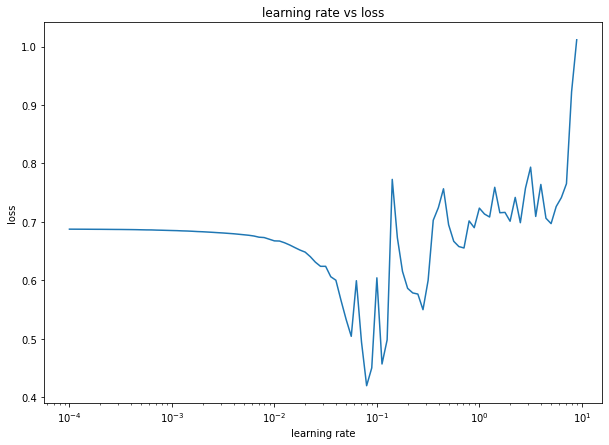

In [ ]:
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("learning rate")
plt.ylabel("loss")
plt.title("learning rate vs loss")


In [ ]:
model_10 = tf.keras.Sequential([
  tf.keras.Input([2,]),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")                               
])

model_10.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.04),
                metrics=["accuracy"])

#lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 **(epoch/20))

history_10 = model_10.fit(x_test, y_test, epochs=30)

Epoch 1/30
7/7 [==============================] - 1s 3ms/step - loss: 0.6781 - accuracy: 0.5350
Epoch 2/30
7/7 [==============================] - 0s 3ms/step - loss: 0.6509 - accuracy: 0.6350
Epoch 3/30
7/7 [==============================] - 0s 3ms/step - loss: 0.6289 - accuracy: 0.6300
Epoch 4/30
7/7 [==============================] - 0s 3ms/step - loss: 0.6086 - accuracy: 0.6600
Epoch 5/30
7/7 [==============================] - 0s 4ms/step - loss: 0.5864 - accuracy: 0.6750
Epoch 6/30
7/7 [==============================] - 0s 3ms/step - loss: 0.5666 - accuracy: 0.7450
Epoch 7/30
7/7 [==============================] - 0s 4ms/step - loss: 0.5586 - accuracy: 0.7400
Epoch 8/30
7/7 [==============================] - 0s 3ms/step - loss: 0.5088 - accuracy: 0.8200
Epoch 9/30
7/7 [==============================] - 0s 3ms/step - loss: 0.4926 - accuracy: 0.7850
Epoch 10/30
7/7 [==============================] - 0s 4ms/step - loss: 0.4467 - accuracy: 0.8600
Epoch 11/30
7/7 [======================

In [ ]:
model_10.evaluate(x_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0495 - accuracy: 1.0000


[0.049494076520204544, 1.0]